
📊 Key Performance Indicators


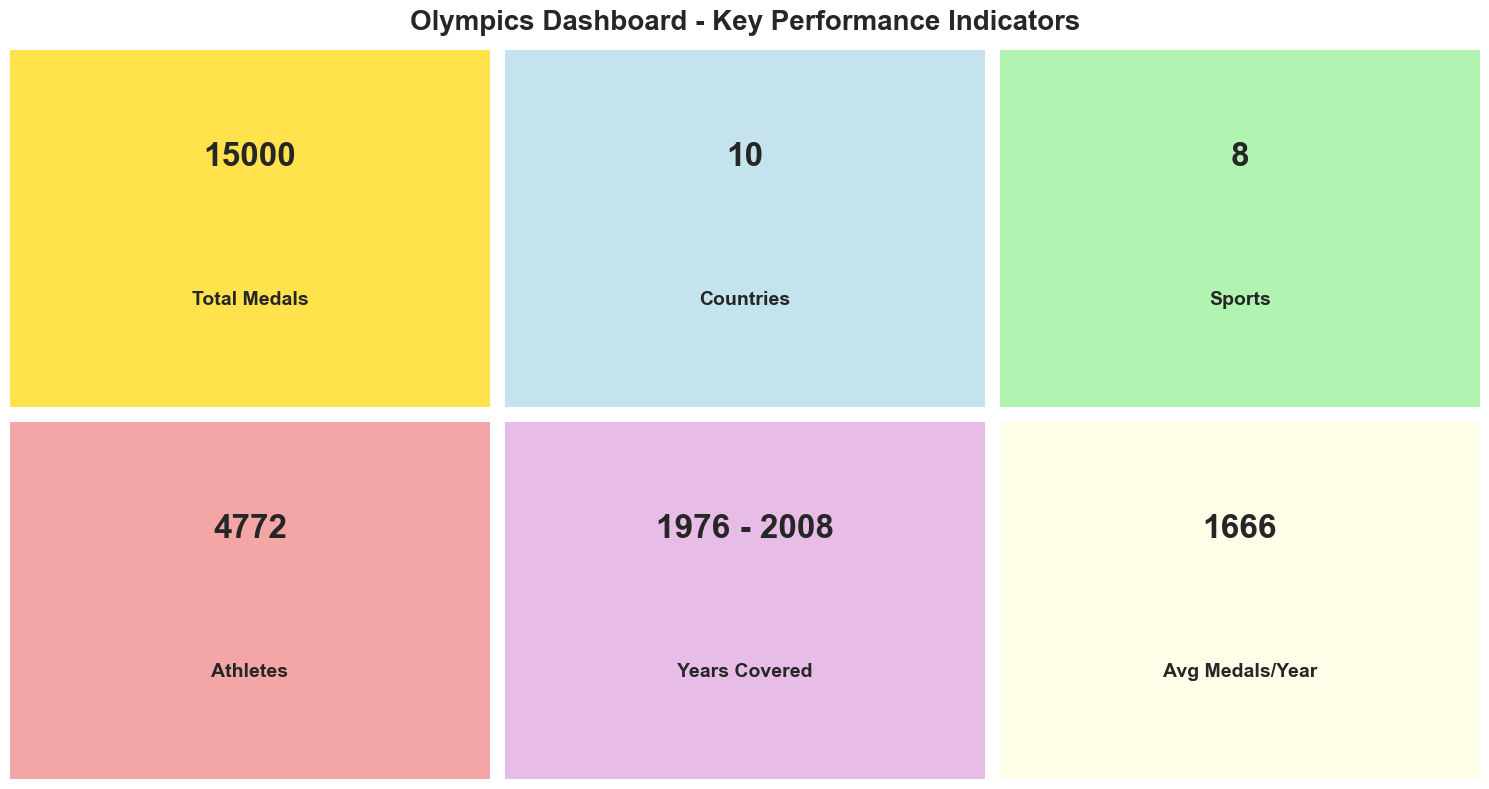


🥇 Medal Distribution Analysis


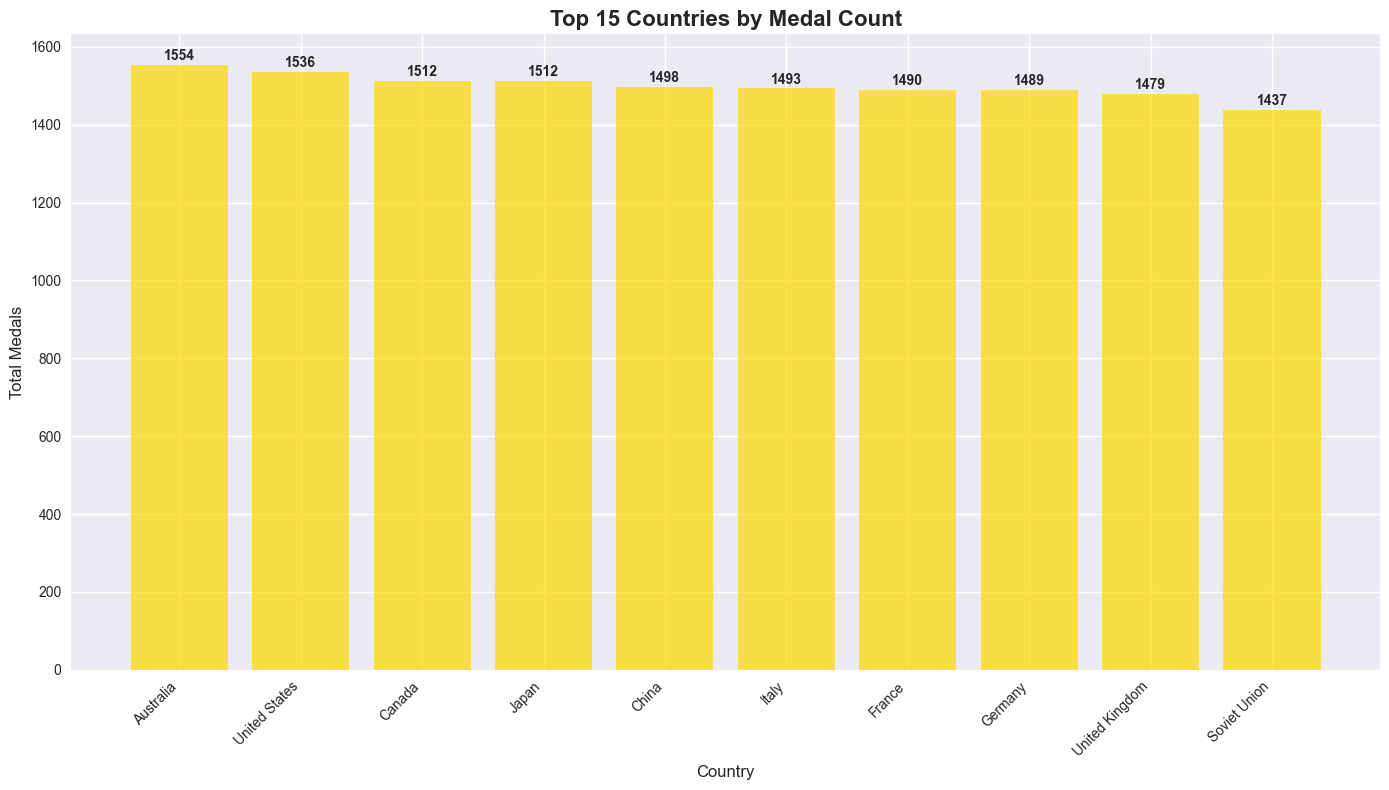

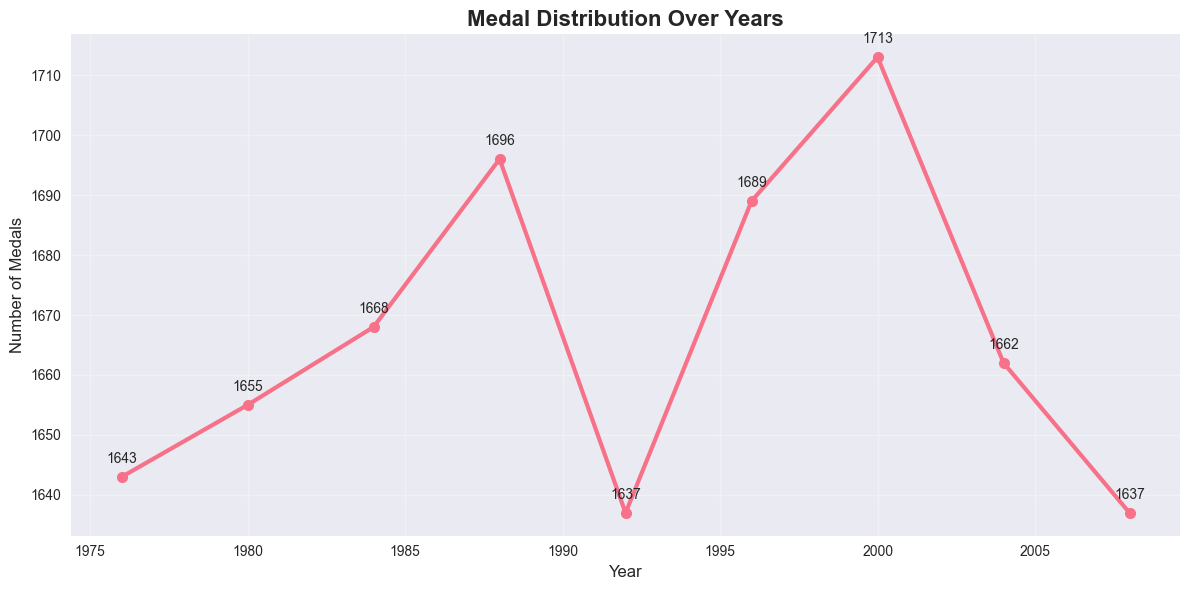

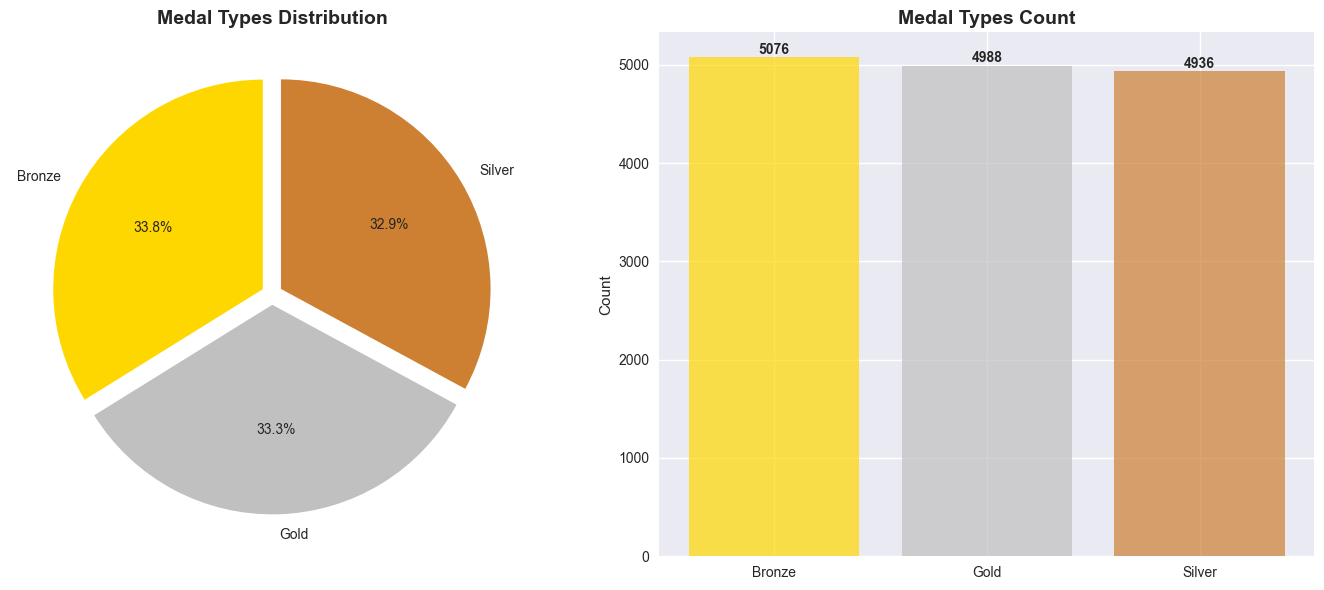


👥 Demographics Analysis


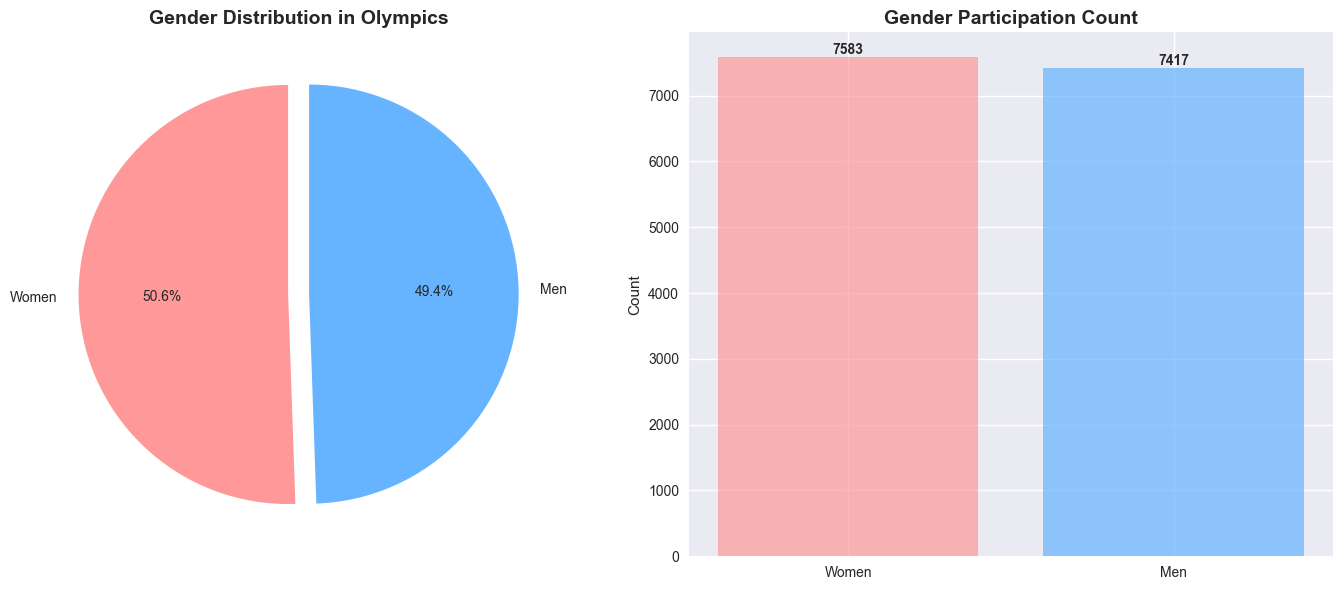


🏃 Sports Performance Analysis


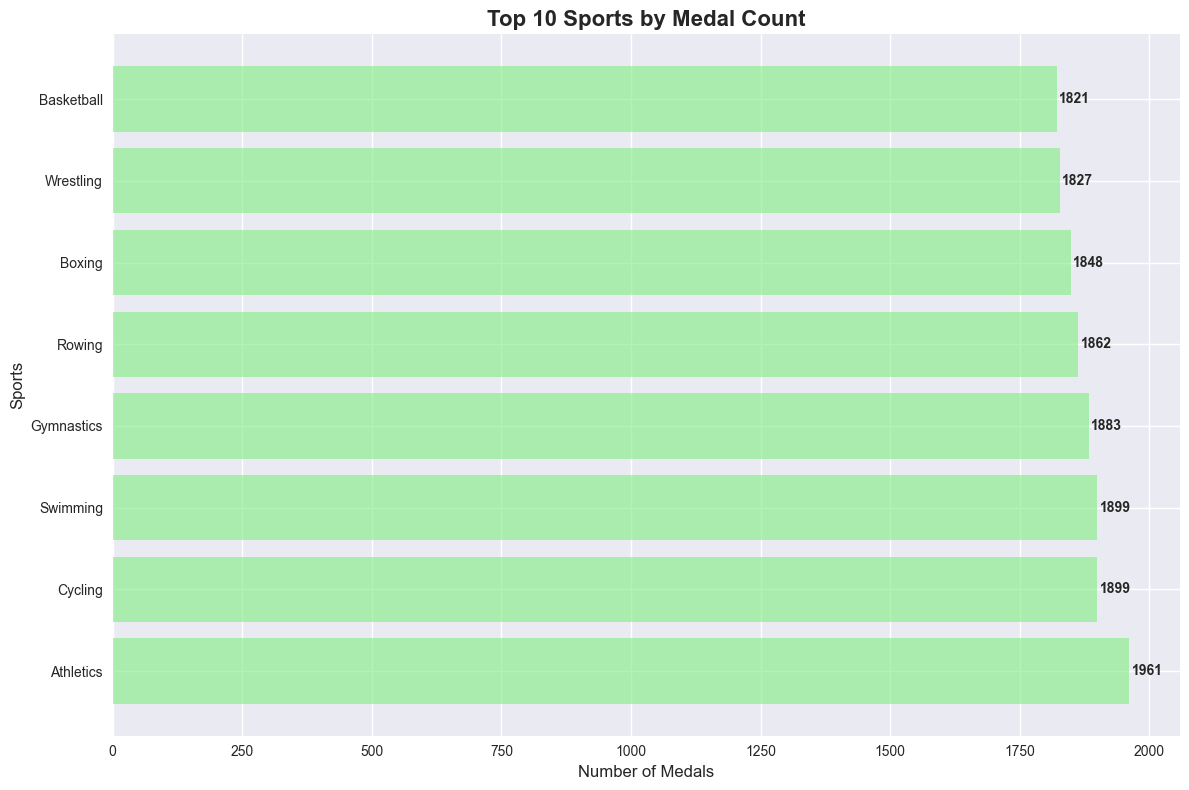


🌟 Top Performers


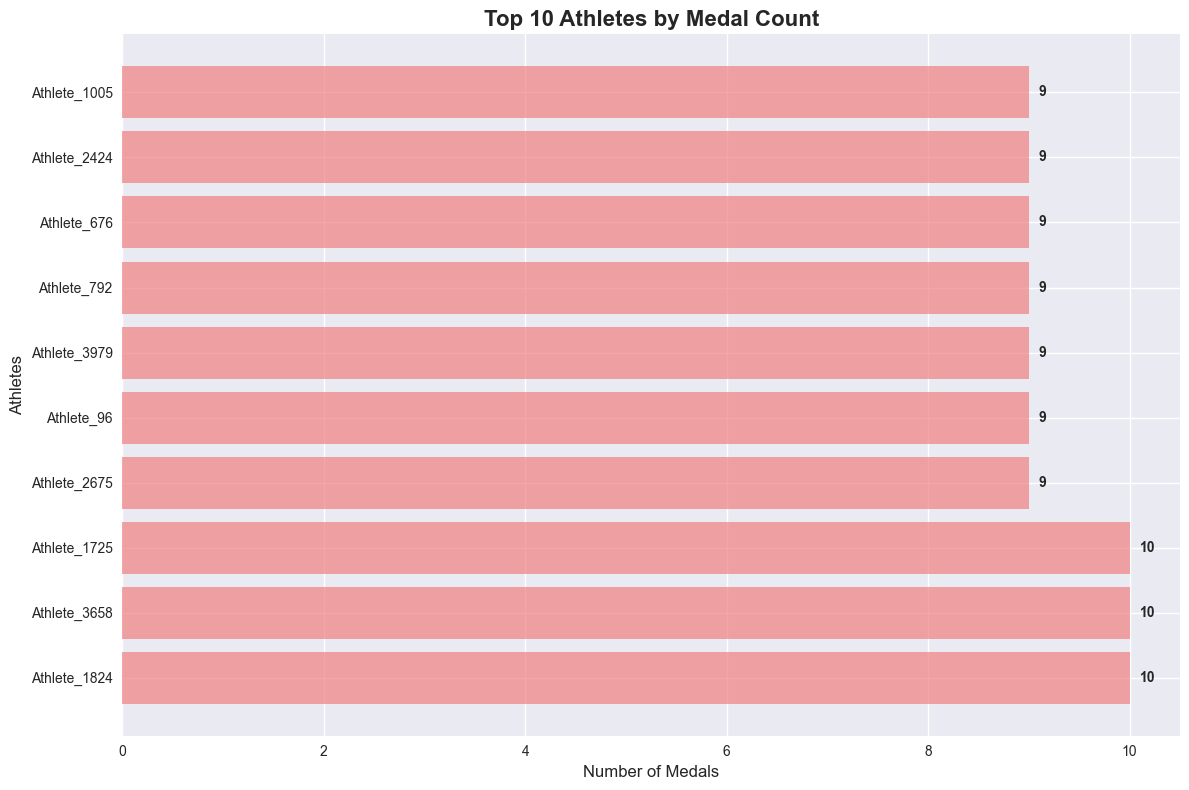


📈 Advanced Analytics


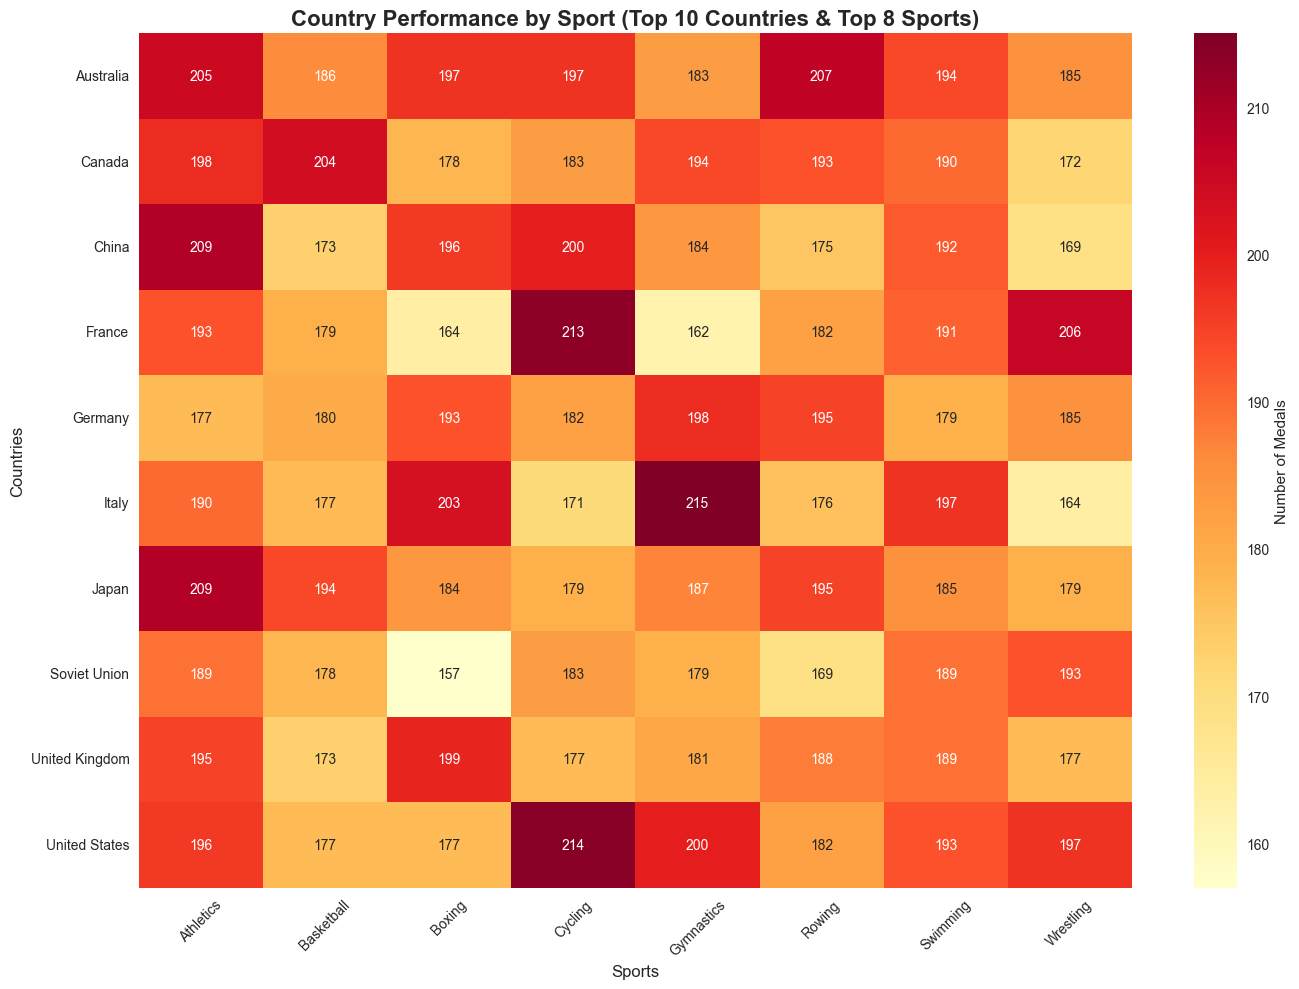

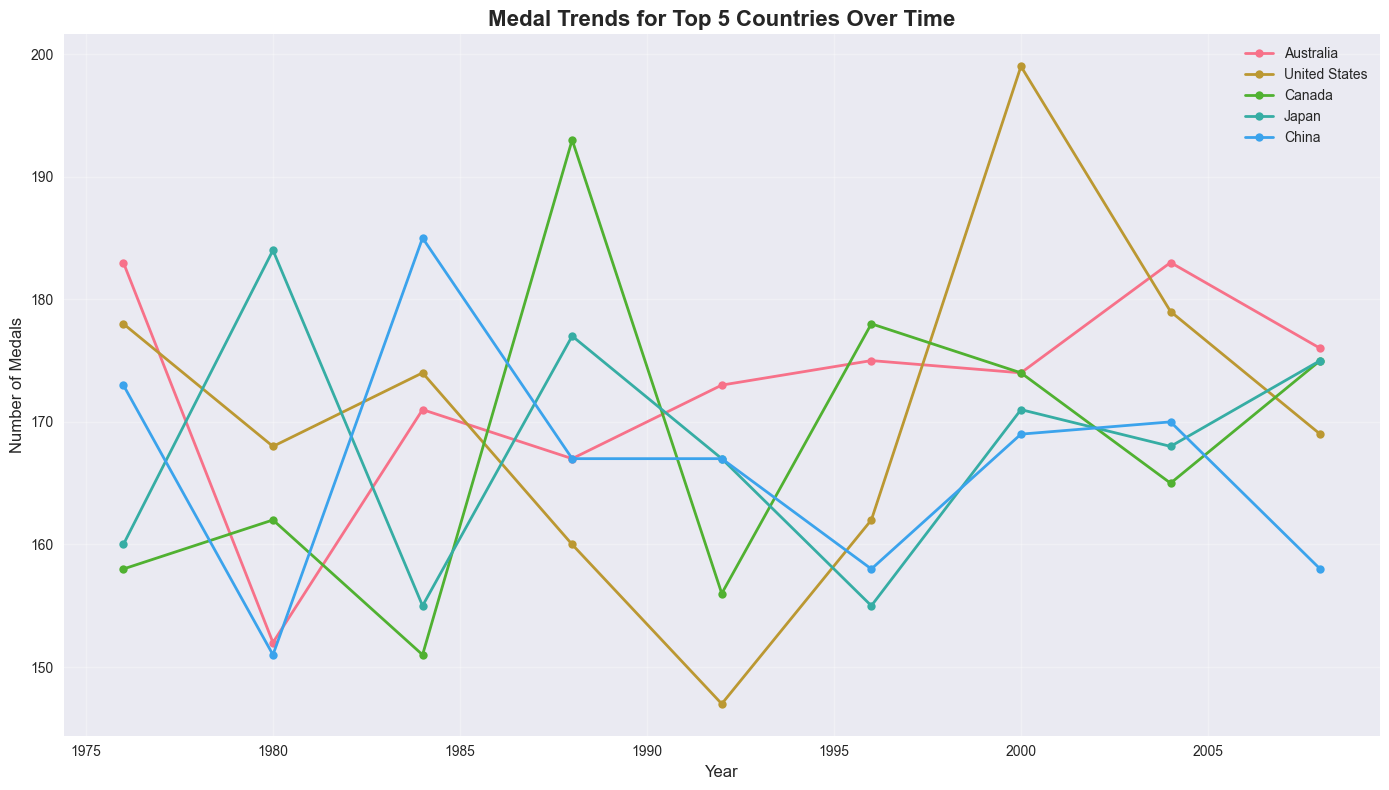

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class OlympicsDashboard:
    def __init__(self, data_path=None):
        """
        Initialize the Olympics Dashboard
        """
        if data_path:
            self.df = pd.read_csv(data_path, encoding='latin1')
        else:
            # Sample data structure based on your dataset
            self.df = self.create_sample_data()
        
        self.prepare_data()
    
    def create_sample_data(self):
        """
        Create sample data based on the structure from your document
        """
        
        np.random.seed(42)
        
        cities = ['Montreal', 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney', 'Athens', 'Beijing']
        years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
        sports = ['Athletics', 'Swimming', 'Gymnastics', 'Basketball', 'Boxing', 'Wrestling', 'Cycling', 'Rowing']
        countries = ['United States', 'Soviet Union', 'China', 'Germany', 'Australia', 'Italy', 'France', 'Japan', 'Canada', 'United Kingdom']
        medals = ['Gold', 'Silver', 'Bronze']
        genders = ['Men', 'Women']
        
        
        data = []
        for _ in range(15000):  # Simulate 15,000 medal records
            data.append({
                'City': np.random.choice(cities),
                'Year': np.random.choice(years),
                'Sport': np.random.choice(sports),
                'Country': np.random.choice(countries),
                'Medal': np.random.choice(medals),
                'Gender': np.random.choice(genders),
                'Athlete': f'Athlete_{np.random.randint(1, 5000)}'
            })
        
        return pd.DataFrame(data)
    
    def prepare_data(self):
        """
        Clean and prepare data for analysis
        """
        
        self.df = self.df.dropna()
        
       
        if 'Year' in self.df.columns:
            self.df['Year'] = self.df['Year'].astype(int)
        
        
        self.total_medals = len(self.df)
        self.total_countries = self.df['Country'].nunique()
        self.total_sports = self.df['Sport'].nunique()
        self.total_athletes = self.df['Athlete'].nunique()
        self.year_range = f"{self.df['Year'].min()} - {self.df['Year'].max()}"
    
    def create_kpi_summary(self):
        """
        Create KPI summary cards
        """
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        fig.suptitle('Olympics Dashboard - Key Performance Indicators', fontsize=20, fontweight='bold')
        
        
        kpis = [
            ('Total Medals', self.total_medals, 'gold'),
            ('Countries', self.total_countries, 'lightblue'),
            ('Sports', self.total_sports, 'lightgreen'),
            ('Athletes', self.total_athletes, 'lightcoral'),
            ('Years Covered', self.year_range, 'plum'),
            ('Avg Medals/Year', self.total_medals // (self.df['Year'].nunique()), 'lightyellow')
        ]
        
        for i, (title, value, color) in enumerate(kpis):
            row, col = i // 3, i % 3
            ax = axes[row, col]
            
            # Create KPI card
            ax.add_patch(Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.7))
            ax.text(0.5, 0.7, str(value), ha='center', va='center', fontsize=24, fontweight='bold')
            ax.text(0.5, 0.3, title, ha='center', va='center', fontsize=14, fontweight='bold')
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def plot_medals_by_country(self, top_n=15):
        """
        Plot top countries by medal count
        """
        country_medals = self.df.groupby('Country').size().sort_values(ascending=False).head(top_n)
        
        plt.figure(figsize=(14, 8))
        bars = plt.bar(range(len(country_medals)), country_medals.values, color='gold', alpha=0.7)
        plt.title(f'Top {top_n} Countries by Medal Count', fontsize=16, fontweight='bold')
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Total Medals', fontsize=12)
        plt.xticks(range(len(country_medals)), country_medals.index, rotation=45, ha='right')
        
       
        for bar, value in zip(bars, country_medals.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                    str(value), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_medals_over_time(self):
        """
        Plot medal distribution over years
        """
        medals_by_year = self.df.groupby('Year').size()
        
        plt.figure(figsize=(12, 6))
        plt.plot(medals_by_year.index, medals_by_year.values, marker='o', linewidth=3, markersize=8)
        plt.title('Medal Distribution Over Years', fontsize=16, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Medals', fontsize=12)
        plt.grid(True, alpha=0.3)
        
       
        for x, y in zip(medals_by_year.index, medals_by_year.values):
            plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')
        
        plt.tight_layout()
        plt.show()
    
    def plot_medal_types_distribution(self):
        """
        Plot distribution of medal types
        """
        medal_counts = self.df['Medal'].value_counts()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        
        colors = ['gold', 'silver', '#CD7F32']  # Bronze color
        ax1.pie(medal_counts.values, labels=medal_counts.index, autopct='%1.1f%%', 
                colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
        ax1.set_title('Medal Types Distribution', fontsize=14, fontweight='bold')
        
        
        bars = ax2.bar(medal_counts.index, medal_counts.values, color=colors, alpha=0.7)
        ax2.set_title('Medal Types Count', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Count')
        
       
        for bar, value in zip(bars, medal_counts.values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                    str(value), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_gender_distribution(self):
        """
        Plot gender distribution in sports
        """
        gender_dist = self.df['Gender'].value_counts()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
       
        colors = ['#ff9999', '#66b3ff']
        ax1.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', 
                colors=colors, startangle=90, explode=(0.05, 0.05))
        ax1.set_title('Gender Distribution in Olympics', fontsize=14, fontweight='bold')
        
        
        bars = ax2.bar(gender_dist.index, gender_dist.values, color=colors, alpha=0.7)
        ax2.set_title('Gender Participation Count', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Count')
        
        
        for bar, value in zip(bars, gender_dist.values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                    str(value), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_sports_performance(self, top_n=10):
        """
        Plot top sports by medal count
        """
        sports_medals = self.df.groupby('Sport').size().sort_values(ascending=False).head(top_n)
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(sports_medals)), sports_medals.values, color='lightgreen', alpha=0.7)
        plt.title(f'Top {top_n} Sports by Medal Count', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Medals', fontsize=12)
        plt.ylabel('Sports', fontsize=12)
        plt.yticks(range(len(sports_medals)), sports_medals.index)
        
        
        for bar, value in zip(bars, sports_medals.values):
            plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                    str(value), ha='left', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_top_athletes(self, top_n=10):
        """
        Plot top athletes by medal count
        """
        athlete_medals = self.df.groupby('Athlete').size().sort_values(ascending=False).head(top_n)
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(athlete_medals)), athlete_medals.values, color='lightcoral', alpha=0.7)
        plt.title(f'Top {top_n} Athletes by Medal Count', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Medals', fontsize=12)
        plt.ylabel('Athletes', fontsize=12)
        plt.yticks(range(len(athlete_medals)), athlete_medals.index)
        
       
        for bar, value in zip(bars, athlete_medals.values):
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                    str(value), ha='left', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_country_performance_heatmap(self):
        """
        Create heatmap of country performance by sport
        """
       
        top_countries = self.df['Country'].value_counts().head(10).index
        top_sports = self.df['Sport'].value_counts().head(8).index
        
        
        heatmap_data = self.df[self.df['Country'].isin(top_countries) & 
                              self.df['Sport'].isin(top_sports)].pivot_table(
            index='Country', columns='Sport', aggfunc='size', fill_value=0
        )
        
        plt.figure(figsize=(14, 10))
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
                    cbar_kws={'label': 'Number of Medals'})
        plt.title('Country Performance by Sport (Top 10 Countries & Top 8 Sports)', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Sports', fontsize=12)
        plt.ylabel('Countries', fontsize=12)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    
    def plot_medal_trends_by_top_countries(self):
        """
        Plot medal trends for top 5 countries over time
        """
        top_countries = self.df['Country'].value_counts().head(5).index
        
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            country_data = self.df[self.df['Country'] == country].groupby('Year').size()
            plt.plot(country_data.index, country_data.values, marker='o', 
                    linewidth=2, markersize=6, label=country)
        
        plt.title('Medal Trends for Top 5 Countries Over Time', fontsize=16, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Medals', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def generate_complete_dashboard(self):
        """
        Generate the complete dashboard
        """
      
        
       
        print("\n📊 Key Performance Indicators")
        self.create_kpi_summary()
        
        
        print("\n🥇 Medal Distribution Analysis")
        self.plot_medals_by_country()
        self.plot_medals_over_time()
        self.plot_medal_types_distribution()
        
        
        print("\n👥 Demographics Analysis")
        self.plot_gender_distribution()
        
       
        print("\n🏃 Sports Performance Analysis")
        self.plot_sports_performance()
        
       
        print("\n🌟 Top Performers")
        self.plot_top_athletes()
        
       
        print("\n📈 Advanced Analytics")
        self.plot_country_performance_heatmap()
        self.plot_medal_trends_by_top_countries()
        
       

if __name__ == "__main__":
   
    dashboard = OlympicsDashboard()  
    
   
    dashboard.generate_complete_dashboard()
    
    